In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df  = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## Change the data type

In [34]:
# Check for any mistakes
print(df['CYLINDERS'].max())
print(df['CYLINDERS'].min())
print(df['MODELYEAR'].max())
print(df['MODELYEAR'].min())

12
3
2014
2014


In [35]:
# Change data type for best efficiency
df['MODELYEAR'] = df['MODELYEAR'].astype('int16')
df['MAKE'] = df['MAKE'].astype('category')
df['VEHICLECLASS'] = df['VEHICLECLASS'].astype('category')
df['CYLINDERS'] = df['CYLINDERS'].astype('int16')
df['FUELTYPE'] = df['FUELTYPE'].astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int16   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   object  
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int16   
 6   TRANSMISSION              1067 non-null   object  
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(3), float64(4), int16(2), int64(2), 

In [37]:
print(df['CYLINDERS'].max())
print(df['CYLINDERS'].min())
print(df['MODELYEAR'].max())
print(df['MODELYEAR'].min())

12
3
2014
2014



## Understanding the Data

### `FuelConsumption.csv`:
**`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [38]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [39]:
df.shape

(1067, 13)

In [40]:
"""

y --> Dependent variable is Co2
x --> Independent variable is EngineSize

"""
feature_selections = df[['ENGINESIZE', 'CO2EMISSIONS']]
feature_selections.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


### Fit line (regression line)

- # Explanation:
* ### sns.regplot() is used to draw the regression line
* ### scatter=False ensures that the function only plots the line (so that the scatter points remain from the first plot)
* ### color='red' makes the regression line red for better visibility

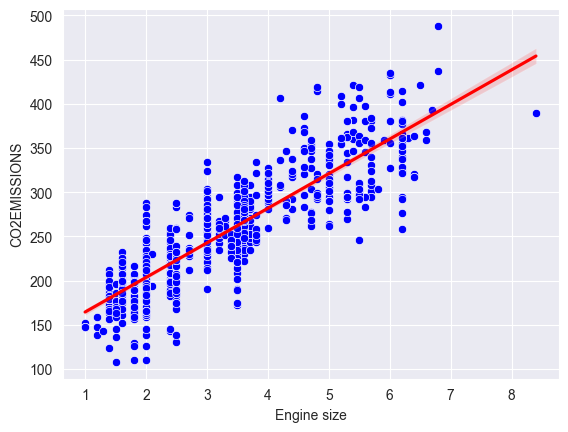

In [41]:
sns.scatterplot(data=feature_selections, x='ENGINESIZE', y='CO2EMISSIONS',color='blue');
sns.regplot(data=feature_selections, x='ENGINESIZE', y='CO2EMISSIONS',color='red', scatter=False)
plt.xlabel("Engine size");
plt.ylabel("CO2EMISSIONS");

# Creating train and test dataset
### mask (a boolean array) to split a dataset into two parts, used for training and testing


In [42]:
mask = np.random.rand(len(feature_selections)) < 0.8
# Generates a NumPy array of random values (between 0 and 1) with the same length as feature_selections.

In [43]:
train = feature_selections[mask]    # Selects rows from feature_selections where the mask is True (i.e., 80% of the data is assigned to the training set).
test = feature_selections[~mask]    # Selects rows where the mask is False (i.e., 20% of the data is assigned to the testing set).

# ~mask negates the boolean mask, flipping True to False and vice versa.

#### Modeling
Using sklearn package to model data.


In [44]:
from sklearn import linear_model

linear = linear_model.LinearRegression()

#### Converts the selected columns from the (train) DataFrame into NumPy arrays using np.asanyarray().
* Why? Scikit-learn works better with NumPy arrays than pandas DataFrames.
* Why double brackets [[]]? This ensures the result is a 2D array (matrix) instead of a 1D array.
* train[['ENGINESIZE']] → Shape (n, 1), needed for model training.

In [45]:
train_x = np.asanyarray((train[['ENGINESIZE']]))
train_y = np.asanyarray((train[['CO2EMISSIONS']]))

In [46]:
linear.fit(train_x, train_y)
"""

linear.fit(input, output)

"""

'\n\nlinear.fit(input, output)\n\n'

* Fits (trains) the linear regression model using train_x (input: Engine Size) and train_y (output: CO2 Emissions).
* The model learns the best-fit line using the least squares method.

- ## The Equation
( x - x_mean )*( y - y_mean ) / ( x - x_mean )**2


# Once trained, the model stores:
* ### Slope (theta_1): linear.coef_
* ### Intercept (theta_0): linear.intercept_

In [47]:
print(f'Slope theta_1: {linear.coef_[0][0]}')
print(f'Intercept theta_0: {linear.intercept_[0]}')

Slope theta_1: 38.93963103757809
Intercept theta_0: 126.55890744129542


In [48]:
# The coefficients
print (f'Coefficients (slope theta_1): {linear.coef_}')
print (f'Intercept (theta_0): {linear.intercept_}')

Coefficients (slope theta_1): [[38.93963104]]
Intercept (theta_0): [126.55890744]


# I wrote the cells twice to show you why i used [0][0]

In [49]:
intercept = linear.intercept_[0]
slope = linear.coef_[0][0]
print(f'Slope (theta_1): {slope}')
print(f'Intercept (theta_0): {intercept}')

Slope (theta_1): 38.93963103757809
Intercept (theta_0): 126.55890744129542


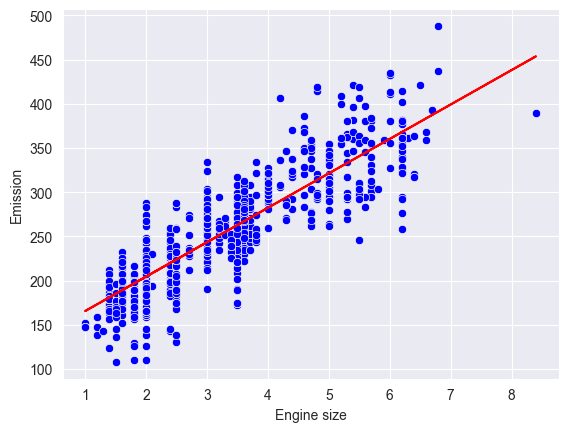

In [50]:
sns.scatterplot(data=feature_selections, x='ENGINESIZE', y='CO2EMISSIONS',color='blue');
plt.plot(train_x, linear.coef_[0][0]*train_x + linear.intercept_[0], '-r');
plt.xlabel("Engine size");
plt.ylabel("Emission");

# Evaluation


* ### (MAE) Mean Absolute Error:

 * Your model's predict for Ex: around 25 units away from the actual CO₂ emissions. This means if an actual emission value is 200, your model might predict somewhere between 175 and 225.
* Lower is better (0 means perfect prediction)
* The difference between actual and predicted


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [52]:
test_x = np.asanyarray((test[['ENGINESIZE']]))
test_y = np.asanyarray((test[['CO2EMISSIONS']]))
y_hat = linear.predict(test_x)

In [53]:
print(f'MAE Mean absolute error: {mean_absolute_error(test_y, y_hat):.3f}')

MAE Mean absolute error: 25.061


* ### (MSE) Mean Squared Error:
* Smaller MSE means your model’s predictions are closer to the actual data.
* Larger MSE means your model is making larger errors, which means it's less accurate.
* Good model = Lower MSE
* Bad model = Higher MSE
* Lower is better

In [54]:
print(f'MSE Mean Squared Error: {mean_squared_error(test_y, y_hat):.3f}')

MSE Mean Squared Error: 1056.132


* ### (R2 Score)
* Ranges from -∞ to 1
* 1 → Perfect fit
* 0 → Model is no better than the mean
* Negative → Model is worse than just using the mean

In [55]:
print(f'R2 score: {r2_score(test_y, y_hat):.3f}')

R2 score: 0.765


* Similar to r2_score, but it ignores systematic bias (mean differences between actual and predicted values).


In [56]:
print(f'Variance {explained_variance_score(test_y, y_hat):.3f}')

Variance 0.767


## Now we can predict the Co2Missions

### Co2Missions = theta_0 + ( theta_1 * Enginesize )

# Use The Model

In [57]:
engin_size = float(input('Enter Engine Size: '))
result = (intercept) + ( slope * engin_size)

print(f'The predication = {result:.2f} g/km"')

The predication = 282.32 g/km"
